# Visualize samples for NGC 4047 in galactocentric radius and angle.

In [1]:
import matplotlib.pyplot as plt
import edge_pydb
from edge_pydb import EdgeTable
from edge_pydb.conversion import gc_polr
import numpy as np
from astropy import units as u
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

## Read the observational values

In [2]:
# Here we forget to specify the path for an HDF5 file so it gives us a list of options
cotab = EdgeTable('NGC4047.comom_smo7.hdf5')

Paths in NGC4047.comom_smo7.hdf5 :
 ['dil', 'smo', 'str']


In [3]:
# Image data (mom0 image)
cotab = EdgeTable('NGC4047.comom_smo7.hdf5', path='smo')
cotab

Name,ix,iy,ra_off,dec_off,rad_arc,azi_ang,mom0_12,emom0_12,mom1_12,emom1_12,mom2_12,emom2_12,sigmol,e_sigmol,sigmol_fo,e_sigmol_fo,mom0_13,emom0_13,mom1_13,emom1_13,mom2_13,emom2_13
,,,deg,deg,arcsec,deg,K km / s,K km / s,km / s,km / s,km / s,km / s,solMass / pc2,solMass / pc2,solMass / pc2,solMass / pc2,K km / s,K km / s,km / s,km / s,km / s,km / s
bytes10,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
NGC4047,1,1,0.026472,-0.017503,100.105,42.997,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NGC4047,1,4,0.026473,-0.016670,97.079,41.505,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NGC4047,1,7,0.026473,-0.015836,94.123,39.919,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NGC4047,1,10,0.026474,-0.015003,91.243,38.231,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NGC4047,1,13,0.026474,-0.014170,88.448,36.435,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NGC4047,1,16,0.026475,-0.013336,85.746,34.524,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NGC4047,1,19,0.026475,-0.012503,83.145,32.491,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NGC4047,1,22,0.026475,-0.011670,80.655,30.329,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [4]:
# For calculating radius we need CARMA reference position
ctrpos = EdgeTable('edge_coflux_smo7.csv', cols=['Name', 'coRactr_smo7', 'coDectr_smo7'])
cotab.join(ctrpos)

In [5]:
# Ctr pos, PA, Inc from LEDA.  Note that RA is given in hours not degrees.
leda  = EdgeTable('edge_leda.csv', cols=['Name', 'ledaRA', 'ledaDE', 'ledaPA', 'ledaAxIncl'])
leda['ledaRA'].convert_unit_to('deg')
cotab.join(leda)

In [6]:
# PA, Inc, and ctr pos from Becca's table.  Note that RA is given in hours not degrees.
rftab  = EdgeTable('edge_rfpars.csv', cols=['Name', 'rfPA', 'rfInc', 'rfKinRA', 'rfKinDecl'])
rftab['rfKinRA'].convert_unit_to('deg')
cotab.join(rftab)
cotab

Name,ix,iy,ra_off,dec_off,rad_arc,azi_ang,mom0_12,emom0_12,mom1_12,emom1_12,mom2_12,emom2_12,sigmol,e_sigmol,sigmol_fo,e_sigmol_fo,mom0_13,emom0_13,mom1_13,emom1_13,mom2_13,emom2_13,coRactr_smo7,coDectr_smo7,ledaRA,ledaDE,ledaPA,ledaAxIncl,rfPA,rfInc,rfKinRA,rfKinDecl
,,,deg,deg,arcsec,deg,K km / s,K km / s,km / s,km / s,km / s,km / s,solMass / pc2,solMass / pc2,solMass / pc2,solMass / pc2,K km / s,K km / s,km / s,km / s,km / s,km / s,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg
str13,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
NGC4047,88,73,-0.010089,0.002500,25.625,-165.763,-0.018266087,1.4720527,nan,105871.19,nan,nan,-0.07854418,6.329827,-0.059007425,4.755372,-0.29205406,0.85514283,3358.6597,543.788,nan,nan,180.7113,48.6362,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,88,31,-0.010086,-0.009167,51.867,109.881,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.7113,48.6362,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,88,76,-0.010089,0.003333,27.341,-158.013,1.7060753,1.3853391,3523.851,34.936607,nan,nan,7.336124,5.956959,5.5113673,4.4752493,0.14962937,0.8043504,3688.964,769.1791,nan,nan,180.7113,48.6362,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,88,79,-0.010089,0.004166,29.493,-151.285,2.246276,1.4150529,3532.1897,24.270676,16.861847,36.969402,9.658987,6.084728,7.2564507,4.571238,0.37594974,0.8210211,3511.8384,111.86954,nan,nan,180.7113,48.6362,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,88,82,-0.010089,0.005000,31.995,-145.539,0.59357595,1.3260304,3556.3633,72.987236,26.99077,49.302982,2.5523767,5.701931,1.9175091,4.283656,0.4246003,0.76866597,3522.5222,60.200554,nan,nan,180.7113,48.6362,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,88,94,-0.010090,0.008333,44.203,-130.041,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.7113,48.6362,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,88,88,-0.010090,0.006666,37.760,-136.541,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.7113,48.6362,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246
NGC4047,88,91,-0.010090,0.007500,40.916,-133.035,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.7113,48.6362,180.71110649999997,48.6362161,99.87,41.3,104.0,42.1,180.71121089999997,48.6362246


## Re-calculate polar coordinates in galaxy plane.  Use the CARMA coordinates to turn the offsets into absolute positions.  Use Becca's ringfit table for center position, PA and INC.

In [7]:
rarc, azdeg = gc_polr(cotab['coRactr_smo7']+cotab['ra_off'], 
                  cotab['coDectr_smo7']+cotab['dec_off'], 
                  cotab['rfKinRA'], cotab['rfKinDecl'],
                  cotab['rfPA'], cotab['rfInc'])

## Produce the dot plots

In [8]:
# From edge_sql
def rsimage(x, y, z, size=1, ax=None, vmin=None, vmax=None, cmap='jet'):
    
    if ax is None:
        fig = plt.figure(figsize=(7,6))
        ax = plt.subplot(1,1,1)
        
    patches = []
    for x1, y1 in zip(x,y):
        circle = Circle((x1, y1), size)
        patches.append(circle)

    colors = z

    p = PatchCollection(patches, cmap=cmap)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    plt.colorbar(p, ax=ax)
    
    if vmax is None:
        vmax = np.nanmax(colors)
    if vmin is None:
        vmin = np.nanmin(colors)

    p.set_clim([vmin, vmax])
    ax.set_xlim(np.min([x.min(),y.min()]),np.max([x.max(),y.max()]))
    ax.set_ylim(np.min([x.min(),y.min()]),np.max([x.max(),y.max()]))

    return ax

Text(0.5, 1.0, 'Azimuthal angle image')

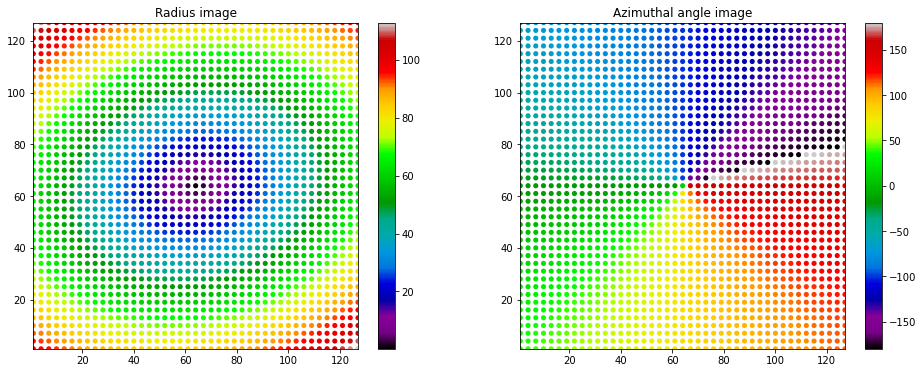

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

rsimage(cotab['ix'], cotab['iy'], rarc, ax=ax1, cmap='nipy_spectral')
ax1.set_title('Radius image')

rsimage(cotab['ix'], cotab['iy'], azdeg, ax=ax2, cmap='nipy_spectral')
ax2.set_title('Azimuthal angle image')

Text(0.5, 1.0, 'Moment 1 image')

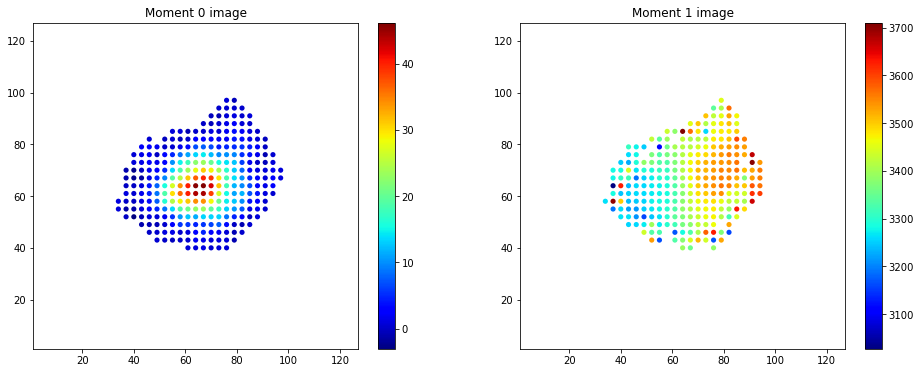

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

rsimage(cotab['ix'], cotab['iy'], cotab['mom0_12'], ax=ax1)
ax1.set_title('Moment 0 image')

rsimage(cotab['ix'], cotab['iy'], cotab['mom1_12'], ax=ax2)
ax2.set_title('Moment 1 image')

## Compare with built-in calculation based on LEDA.

Text(0.5, 1.0, 'Azimuthal angle image')

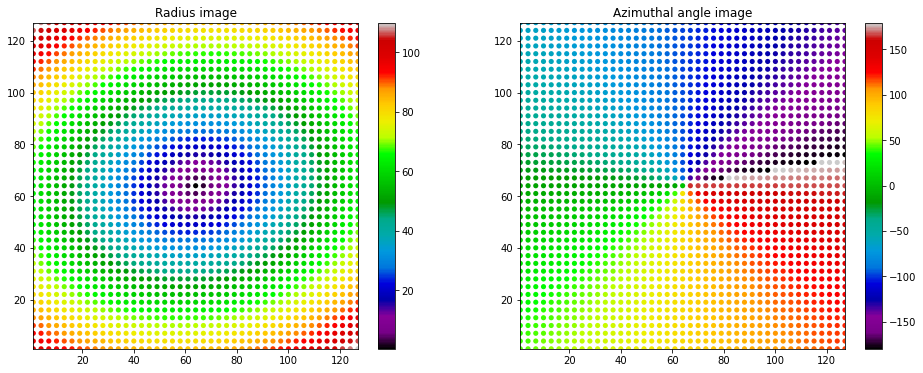

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

rsimage(cotab['ix'], cotab['iy'], cotab['rad_arc'], ax=ax1, cmap='nipy_spectral')
ax1.set_title('Radius image')

rsimage(cotab['ix'], cotab['iy'], cotab['azi_ang'], ax=ax2, cmap='nipy_spectral')
ax2.set_title('Azimuthal angle image')

## Compare Becca's values for all galaxies with LEDA.

In [12]:
leda.join(rftab)
leda

Name,ledaRA,ledaDE,ledaPA,ledaAxIncl,rfPA,rfInc,rfKinRA,rfKinDecl
,deg,deg,deg,deg,deg,deg,deg,deg
str13,float64,float64,float64,float64,float64,float64,float64,float64
ARP220,233.73873749999996,23.5028574,96.46,50.0,337.7,29.7,233.73880049999997,23.5026682
IC0480,118.84661999999999,26.7426992,167.29,84.9,167.9,76.6,118.84618904999998,26.74253902
IC0540,142.54293299999998,7.9027107,170.79,81.0,350.0,68.3,142.54282949999998,7.9025896
IC0944,207.87861299999997,14.0921046,106.54,63.7,105.7,75.0,207.87863849999997,14.0919749
IC1151,239.63476049999997,17.4414742,31.81,68.2,203.9,68.0,239.63476049999997,17.441482
IC1199,242.64308399999996,10.0404167,158.0,72.0,339.3,64.5,242.64316664999998,10.04037496
IC1683,20.6619165,34.437,173.03,66.4,15.6,54.8,20.6619165,34.437
IC2247,123.99617699999999,23.199604,149.14,86.5,328.5,77.7,123.99643528499999,23.19932372


Text(0, 0.5, '$\\Delta$DEC [arcsec]')

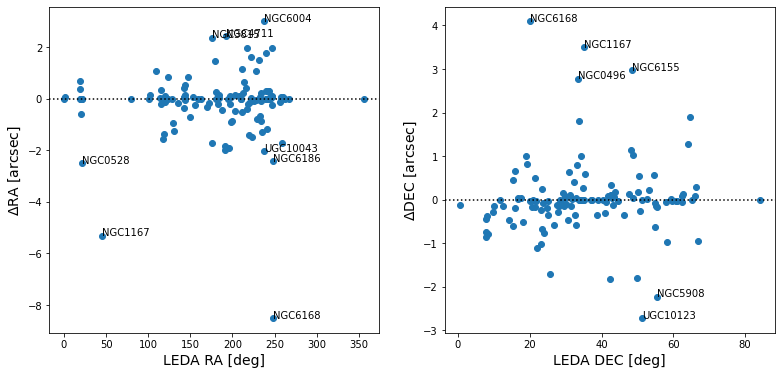

In [13]:
raoff = (leda['rfKinRA']-leda['ledaRA'])*3600*np.cos(np.radians(leda['ledaDE']))
dcoff = (leda['rfKinDecl']-leda['ledaDE'])*3600

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,6))

ax1.scatter(leda['ledaRA'], raoff)
deviates = (abs(raoff)>2)
texts = [ax1.text(leda['ledaRA'][i], raoff[i], leda['Name'][i]) for i in deviates.nonzero()[0]]
ax1.axhline(ls=':', color='k')
ax1.set_xlabel('LEDA RA [deg]',fontsize=14)
ax1.set_ylabel('$\Delta$RA [arcsec]',fontsize=14)

ax2.scatter(leda['ledaDE'], dcoff)
deviates = (abs(dcoff)>2)
texts = [ax2.text(leda['ledaDE'][i], dcoff[i], leda['Name'][i]) for i in deviates.nonzero()[0]]
ax2.axhline(ls=':', color='k')
ax2.set_xlabel('LEDA DEC [deg]',fontsize=14)
ax2.set_ylabel('$\Delta$DEC [arcsec]',fontsize=14)

Text(0, 0.5, 'RINGFIT cos(inc)')

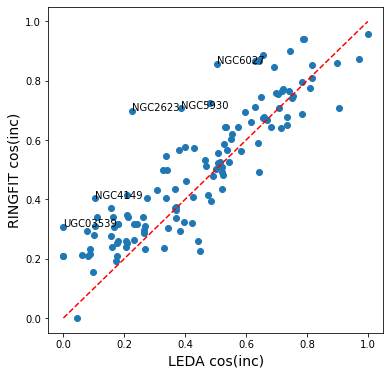

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
ledacosi = np.cos(np.radians(leda['ledaAxIncl']))
rfcosi = np.cos(np.radians(leda['rfInc']))
ax.scatter(ledacosi, rfcosi)
ax.plot([0,1],[0,1],'r--')
deviates = (abs(ledacosi-rfcosi)>0.3)
texts = [plt.text(ledacosi[i], rfcosi[i], leda['Name'][i]) for i in deviates.nonzero()[0]]
plt.xlabel('LEDA cos(inc)',fontsize=14)
plt.ylabel('RINGFIT cos(inc)',fontsize=14)

Text(0, 0.5, 'RINGFIT PA [deg]')

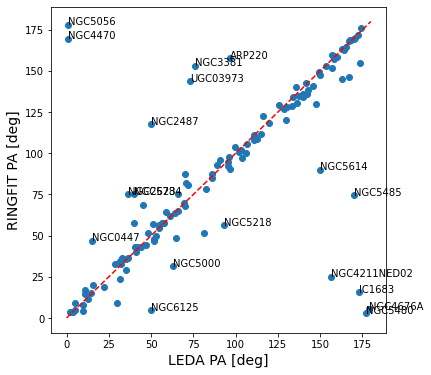

In [15]:
leda['rfPA'][leda['rfPA'] >= 180] -= 180
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(leda['ledaPA'],leda['rfPA'])
deviates = (abs(leda['ledaPA']-leda['rfPA'])>30)
texts = [plt.text(leda['ledaPA'][i], leda['rfPA'][i], leda['Name'][i]) for i in deviates.nonzero()[0]]
ax.plot([0,180],[0,180],'r--')
plt.xlabel('LEDA PA [deg]',fontsize=14)
plt.ylabel('RINGFIT PA [deg]',fontsize=14)